# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель исследования:

* Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Откроем файл с данными и изучим общую информацию:

In [26]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [27]:
data = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/real_estate_data.csv'

**Знакомлюсь с данными:**

In [ ]:
display(data.head(10))

**Вывожу на экран наименования столбцов:**

In [ ]:
data.columns

**Описание данных:**

* total_images — число фотографий квартиры в объявлении
* last_price — цена на момент снятия с публикации
* total_area — общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition — дата публикации
* rooms — число комнат
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* floor — этаж
* is_apartment — апартаменты (булев тип)
* studio — квартира-студия (булев тип)
* open_plan — свободная планировка (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км 
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

**Знакомлюсь с информацией о датафрейме:**

In [ ]:
data.info()

**Строю гистограммы по каждоому из столбцов:**

In [ ]:
data.hist(figsize=(15, 20));

**Можно отметить, что:**
* В некоторых столбцах с данными имеются пропуски
* На гистограммах по отдельно взятым столбцам видно длинные "хвосты", что говорит о наличии выбросов и аномалий.
* Для дальнейшей работы с данными требуется изменить их тип на более пригодный для совершения арифметических операций.

### Предобработка данных

**Проверяю данные на наличие пропусков в каждом отдельном столбце:**

In [ ]:
data.isna().sum()

In [ ]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции')

In [5]:
pass_value_barh(data)

NameError: name 'pass_value_barh' is not defined

**Заменяю пропуски на подходящие по смыслу значения:**

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)

* Заполняю пропуски в living_area медианными значениями в зависимости от количества комнат.

In [ ]:
data.isna().sum()

**Проверяю как заменились пропущенные значения на булевы в столбце "Апартаменты":**

In [6]:
data['is_apartment'].unique()

NameError: name 'data' is not defined

**Я не заполнил пропуски в следующих столбцах, так как логичную замену предложить невозможно:**

Причиной возникновения пропусков в этих столбцах мог послужить человеческий фактор:

* ceiling_height 
* floors_total
* kitchen_area
* locality_name

Причиной возникновения пропусков в этих столбцах мог послужить технический сбой:

* airports_nearest         
* cityCenters_nearest    
* parks_around3000         
* parks_nearest           
* ponds_around3000        
* ponds_nearest          
* days_exposition   



**Проверяю объём датафрейма:**

In [ ]:
data.shape

**В таблице 22 столбца и 23699 строк**

In [ ]:
data.dtypes

**Привожу данные к более человекочитаемому и подходящему для арифметических операций виду:**

In [ ]:
columns_to_replace = ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for column in columns_to_replace:
    data[column] = data[column].astype(float)

In [ ]:
columns_to_replace = ['last_price', 'balcony']
for column in columns_to_replace:
    data[column] = data[column].astype(int)

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

NameError: name 'data' is not defined

In [ ]:
data.dtypes

**Нахожу коэффициент соотношения средней общей площади (там где она есть .isnull() == False) к среднему жилой площади:**

In [ ]:
area_kof = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()== False]['living_area'].mean() 

**Заполняю пропуски отношением общей площади к коэффициенту соотношения средней общей площади к среднему жилой площади:**

In [8]:
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

NameError: name 'data' is not defined

**Проверяю данные после изменения их типа:**

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
display(data.tail(10))

In [ ]:
data.head(4).T

**Проверяю типы данных после их изменения:**

In [ ]:
data.dtypes

* Из-за наличия пропусков, логичную замену которым предложить невозможно, привести данные к целочисленным значениям во всех подходящих для этого столбцах не вышло.

**Произвожу проверку на корректность значений площадей:**

In [10]:
data.shape

NameError: name 'data' is not defined

In [ ]:
data.info()

In [ ]:
data.hist(figsize=(15, 20));

### Поиск дубликатов:

In [ ]:
data['locality_name'].duplicated().sum()


In [ ]:
data['locality_name'].unique()

In [ ]:
data['locality_name'].nunique()

**Убираем тип населённого пункта:**

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [ ]:
data['locality_name'] = data['locality_name'].replace(['село ', 'городской поселок', 'посёлок', 'деревня', 'коттеджный', 'станции', 'садовое товарищество', 'городского типа', 'поселок', 'садоводческое некоммерческое товарищество', 'при железнодорожной'], '', regex=True)

**Убираем всё в названии населённого пункта до заглавной буквы:**

In [ ]:
data['locality_name'] = data['locality_name'].str.replace(r"^(?![А-Я]).+?(?=[А-Я])", "", regex=True)

In [ ]:
data['locality_name'].nunique()

**Проверяем очищенные от дубликатов данные:**

In [11]:
list(data['locality_name'].sort_values(ascending=False).unique())

NameError: name 'data' is not defined

**Поиск аномальных значений:**

In [ ]:
data.shape

In [ ]:
data['ceiling_height'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('ceiling_height')

In [ ]:
data['ceiling_height'].describe()

In [ ]:
data['ceiling_height'].sort_values(ascending=False).unique()

**В столбце ceiling_height указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м.**

In [ ]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})

In [ ]:
data['ceiling_height'].sort_values(ascending=False).unique()

In [ ]:
data['ceiling_height'].sort_values(ascending=False).unique()

In [ ]:
data.shape[0]

**Заполним пропуски в столбце медианным значением:**

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

**Очистим данные от выбросов:**

In [ ]:
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 4)]  

In [12]:
data.boxplot('ceiling_height')

NameError: name 'data' is not defined

In [ ]:
data['ceiling_height'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.shape

### Очищаю столбцы датафрейма от аномальных значений:

**Выявляю по графикам аномальные значения и удаляю их из датафрейма методом query(), перед этим заполнив пропуски медианными значениями. После удаления аномальных значений снова проверяю графики на наличие выбросов.**

In [ ]:
data['total_images'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('total_images')

**Удалим строки с количеством фотографи больше 20:**

In [ ]:
data['total_images'] = data['total_images'].fillna(data['total_images'].median())

In [ ]:
data = data.query('total_images <= 20  and total_images.notnull()')

#### check

In [ ]:
# check
data.shape[0]

In [ ]:
data['total_images'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('total_images')

**Не понял, что значит le8 на графике ниже и как правильно убрать из столбца выбросы**

In [13]:
data.shape

NameError: name 'data' is not defined

In [ ]:
data['last_price'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('last_price')

In [ ]:
data['last_price'] = data['last_price'].fillna(data['last_price'].median())

In [ ]:
data = data.query('(800000 <= last_price <= 50000000) and (last_price.notnull())')

In [ ]:
data['last_price'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.shape

In [ ]:
data['total_area'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('total_area')

In [ ]:
data = data.query('(23 <= total_area <= 260) and (total_area.notnull())')

In [ ]:
data['total_area'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.shape

In [ ]:
data['rooms'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('rooms')

In [ ]:
data = data.query('rooms <= 6  and rooms.notnull()')

In [ ]:
data['rooms'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('rooms')

In [ ]:
data.shape

In [ ]:
data['floors_total'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('floors_total')

In [ ]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [ ]:
data = data.query('floors_total <= 27 and floors_total.notnull()')

In [ ]:
# check
data.shape[0]

In [ ]:
data['floors_total'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('floors_total')

In [ ]:
data['living_area'].hist(bins=100, figsize=(12, 8))

In [15]:
data.boxplot('living_area')

NameError: name 'data' is not defined

In [ ]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [ ]:
# check
data.shape[0]

In [ ]:
data = data.query('12 <= living_area <= 180 and living_area.notnull()')

In [ ]:
# check
data.shape[0]

In [ ]:
data['living_area'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('living_area')

In [ ]:
data['floor'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('floor')

In [ ]:
data.shape

In [ ]:
data['kitchen_area'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('kitchen_area')

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [16]:
# check
data.shape[0]

NameError: name 'data' is not defined

In [ ]:
data = data.query('5 <= kitchen_area <= 38 and kitchen_area.notnull()')

In [ ]:
# check
data.shape[0]

In [ ]:
data['kitchen_area'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('kitchen_area')

In [ ]:
data['balcony'].hist(bins=100, figsize=(12, 8))

In [ ]:
data['airports_nearest'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('airports_nearest')

In [ ]:
data['cityCenters_nearest'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.boxplot('cityCenters_nearest')

In [ ]:
data['parks_around3000'].hist(bins=100, figsize=(12, 8))

In [ ]:
data['parks_nearest'].hist(bins=100, figsize=(12, 8))

In [ ]:
data['ponds_around3000'].hist(bins=100, figsize=(12, 8))

In [ ]:
data['ponds_nearest'].hist(bins=100, figsize=(12, 8))

In [ ]:
data.shape

In [ ]:
data['days_exposition'].hist(bins=100, figsize=(12, 8))

In [18]:
data = data[(data['days_exposition'] <= 1095) | (data['days_exposition'].isna())]

NameError: name 'data' is not defined

In [ ]:
data['days_exposition'].hist(bins=100, figsize=(12, 8));

#### check nan

In [ ]:
data.shape

**Отфильтровалась 161 запись. Способ работает. Спасибо!)))**

In [ ]:
# check
data.info()

In [ ]:
# check
data.shape[0]

In [ ]:
data['days_exposition'].hist(bins=100, figsize=(12, 8))

**Выведем очищенную от аномальных значений таблицу на экран**

In [ ]:
display(data.head(10))

In [ ]:
data['floors_total'] = data['floors_total'].astype(int)

In [ ]:
data.info()

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

In [20]:
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


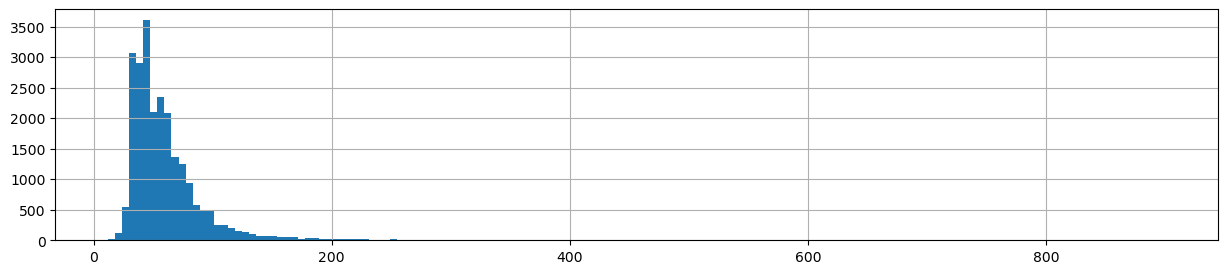

In [21]:
df_check.total_area.hist(bins = 150, figsize = (15,3));

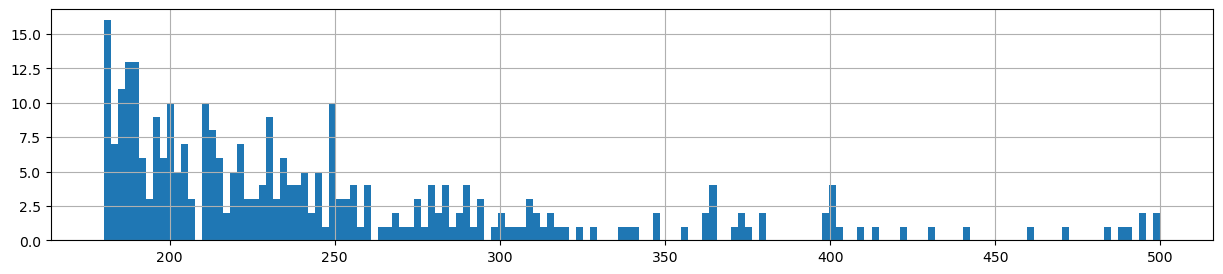

In [22]:
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

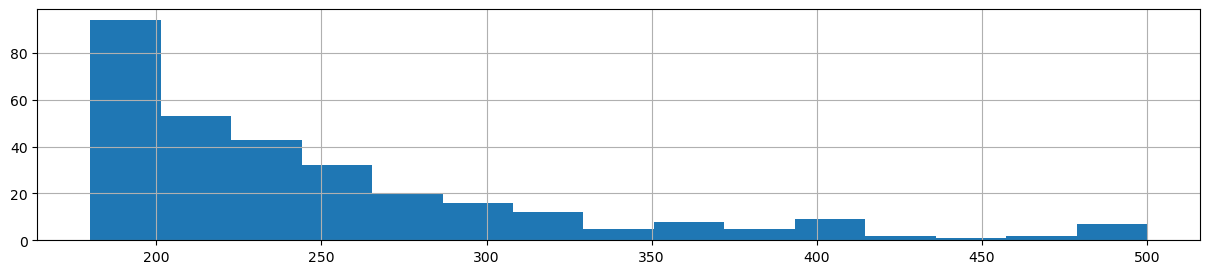

In [23]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

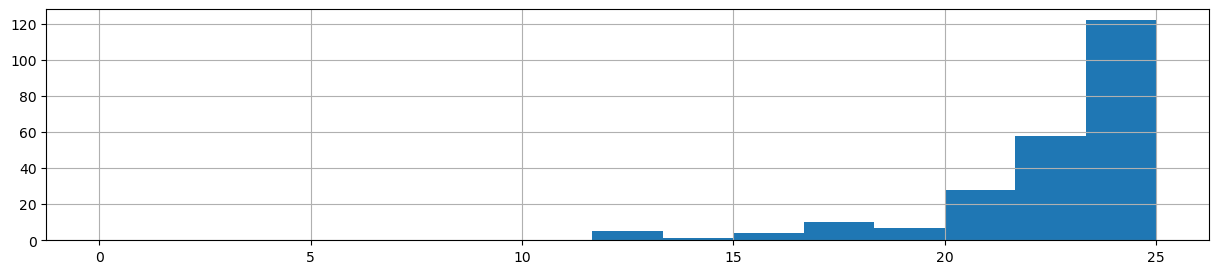

In [24]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [25]:
data.shape

NameError: name 'data' is not defined

In [ ]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

### Посчитайте и добавьте в таблицу новые столбцы

**Расчитаем цену одного квадратного метра:**

In [ ]:
data['price_one_meter'] = data['last_price']/data['total_area']

In [ ]:
data['price_one_meter']

**Определим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [ ]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [ ]:
data['weekday_exposition']

**Определим месяц публикации объявления:**

In [ ]:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [ ]:
data['month_exposition']

**Определим год публикации объявления:**

In [ ]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
data['year_exposition']

**Определим тип этажа квартиры (значения — «первый», «последний», «другой»):**

In [ ]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
data['floor_type'] = data.apply(floor_type, axis = 1)

In [ ]:
data['floor'].unique()

In [ ]:
data['floor_type']

**Определим расстояние до центра города в километрах (переведём из м в км и округлим до целых значений):**

In [ ]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest']/1000).round()

**Заполним пропуски нулями, чтобы привести значения столбца к целым:**

In [ ]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].fillna(0).astype(int).round()

**Отсеем значения равные 0, чтобы на них не было пика при анализе:**

In [ ]:
data['city_centers_nearest_km']

### Проведите исследовательский анализ данных

**Построим отдельные гистограммы для каждого из параметров:**

In [ ]:
data.head(10)

In [ ]:
data['total_area'].hist(bins=100, figsize=(12, 8), legend = True)

**Площадь большинства объектов недвижимости колеблется в пределах 30 - 60 квадратных метров. Чем больше площадь квартиры, тем она уникальнее.**

In [ ]:
data['living_area'].hist(bins=100, figsize=(12, 8), legend = True)

**График жилой площади квартир имеет 2 пика. Чаще жилая площадь колеблется в пределах от 15 до 55 квадратных метров.**

In [ ]:
data['kitchen_area'].hist(bins=60, figsize=(12, 8), legend = True)

**Чаще всего встречаются кухни с площадью от 5 до 15 квадратных метров.**

In [ ]:
(data['last_price']/1000000).hist(bins=60, figsize=(12, 8), legend = True)

**Чем дешевле квартиры, тем чаще они встречаются.**

In [ ]:
data['rooms'].hist(bins=8, figsize=(12, 8), legend = True)

**Больше всего однокомнатных и двухкомнатных квартир. Квартиры с числом комнат больше 6 встречаются крайне редко.**

In [ ]:
data['ceiling_height'].hist(bins=40, figsize=(12, 8), legend = True)

**Чаще всего встречаются квартиры с высотой потолков 2,7 метра. Высота потолков варьируется от 2,4 до 4-х метров. Есть редкие исключения.**

In [ ]:
data['floor'].hist(bins=30, figsize=(12, 8), legend = True)

**Больше всего квартир располагаются на этажах от 1-го до 5-го. Квартиры на верхних этажах встречаются реже, чем на нижних.**

In [ ]:
data['floor_type'].hist(bins=3, figsize=(12, 8), legend = True)

**Больше всего квартир располагается не на первом и не на последнем этажах. На последнем этаже квартир всё же немного больше, чем на первом.**

In [ ]:
data['floors_total'].hist(bins=30, figsize=(12, 8), legend = True)

**Чаще всего встречаются пяти и девятиэтажные дома.**

In [ ]:
data['cityCenters_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Больше всего квартир находятся на расстоянии от 9 до 17-ти километров от центра города. Так же виден пик в 5-ти километрах от центра. С удалением от центра количество недвижимости падает.**

In [ ]:
data['airports_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Ближе 5-ти километров от аэропорта жилья не найти, зато от 5-ти до 50 километров от него жилья довольно много.**

In [ ]:
data['parks_nearest'].hist(bins=100, figsize=(12, 8), legend = True)

**Парки в основном располагаются в 500 метрах от жилья.**

In [ ]:
data['weekday_exposition'].hist(bins=12, figsize=(12, 8))

**Чаще объявлениия о продаже недвижимости размещают по будням, чем по выходным. Примерно в 2 раза чаще.**

In [ ]:
data['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True)

**Меньше всего недвижимости продаётся в декабре, январе и мае. Больше продают в феврале и ноябре.**

In [ ]:
display(data.head(10))

In [ ]:
(
    data[['month_exposition', 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

In [ ]:
(
    data[['month_exposition']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

In [ ]:
(
    data[['month_exposition', 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

In [ ]:
data.month_exposition.value_counts().to_frame()

In [ ]:
first_year = data.query('year_exposition == 2016')

In [ ]:
first_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
second_year = data.query('year_exposition == 2017')

In [ ]:
second_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
third_year = data.query('year_exposition == 2018')

In [ ]:
third_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
fourth_year = data.query('year_exposition == 2019')

In [ ]:
fourth_year['month_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

**Построим гистограмму:**

In [ ]:
data['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True)

**По этой гистограмме мы видим, что чаще всего квартиры продаются в первые 3-4 месяца после публикации объявления.**

**Посчитаем среднее и медиану:**

In [ ]:
(
    data[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)


* Медианное значение подтверждает вывод, сделанный по гистограмме.
* Почему среднее получилось - 181 день, а не 547, я не понял


In [ ]:
first_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
(
    first_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

**В 2016-м году недвижимость чаще продавалась в течение 7,5 месяцев**

In [ ]:
second_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
(
    second_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

**В 2017-м году недвижимость чаще продавалась в течение 3-х месяцев**

In [ ]:
third_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
(
    third_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

**В 2018-м году недвижимость чаще продавалась чуть больше 2-х месяцев**

In [ ]:
fourth_year['days_exposition'].hist(bins=24, figsize=(12, 8), legend = True);

In [ ]:
(
    fourth_year[['days_exposition']]
    .apply (['count', 'min', 'max', 'median', 'mean'])   
    .style.format("{:,.2f}")
)

**В 2019-м году недвижимость чаще продавалась меньше чем за месяц, но 2019, по данным - год неполный.**

In [ ]:
# Моды на реальных данных
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

**Прочитал условия размещения объявлений на Яндекс Недвижимости. Первое и единственное, что "бросилось в глаза" - это срок бесплатного размещения, который для СПБ равен 120 дням. Этот срок совпадает со средним сроком продажи недвижимости за 2017 и 2018 годы. Возможно при окончании срока бесплатного размещения люди просто удаляют объявления. А те объявления, что задерживаются в базе больше 4-х месяцев - платные.**

In [ ]:
(
    data[['days_exposition', 'rooms', 'total_area', 'ceiling_height', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .quantile([0.0012, .25, .5, .75, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

* Быстрее всего продаются двушки с площадью 50-60 кв. метров, с высотой потолков 2,7 м и стоимостью 5-6 млн, неходящиеся не на первых и не на последних этажах.
* Дольше продаются многокомнатные пентхаусы на 27 этаже за 30 млн и с высотой потолков 4 метра.

### Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта? Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией используем сводные таблицы.

**Построим графики, которые покажут зависимость цены от указанных ниже параметров:**

**Зависимость цены от удалённости от центра:**

In [ ]:
data.plot(x='last_price', y='city_centers_nearest_km', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['city_centers_nearest_km']))

По графику  выше и по коефициенту Пирсона можно сказать, что стоимость недвижимости не зависит от удаления от центра. Но я думаю, что что-то сделано некорректно. Прошу подсказать, как сделать правильно...

**Зависимость цены от общей площади:**

In [ ]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['total_area']))

* С увеличением прощади помещения растет его цена. Прямая кореляция, зависимость сильная.

**Зависимость цены от жилой площади:**

In [ ]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['living_area']))

* Чем больше жилая площадь, чем выше стоимость помещения. Кореляция прямая высокая, но ниже, чем кореляция с общей площадью.

**Зависимость цены от площади кухни:**

In [ ]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['kitchen_area']))

* С увеличением площади кухни, растёт стоимость недвижимости. Но кореляция ниже, чем в случаях выше.

**Зависимость стоимости недвижимости от количества комнат:**

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['rooms']))

* С увеличением количества комнат, растёт стоимость недвижимости. Кореляция прямая, но не очень сильная.

**Зависимость стоимости от типа этажа, на котором расположена квартира (первый, последний, другой):**

* Создаю числовой столбец, характеризующий категорию этажа

In [ ]:
def categorize_floor(floor):
    """
    Возвращает группу по значению этажа floor, используя правила:
    - '1', если floor == первый;
    - '2', если floor == последний;
    - '3', если floor == другой;

    """
    
    if floor == 'первый':
        return 1
    if floor == 'последний':
        return 2
    if floor == 'другой':
        return 3


In [ ]:
data['floor_type_number'] = data['floor_type'].apply(categorize_floor)

In [ ]:
display(data.head(10))

In [ ]:
data.plot(x='floor_type_number', y='last_price', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['floor_type_number']))

* От типа этажа стоимость помещения зависит минимально. Но недвижимость не на первом и не на последнем этажах всё таки немного дороже.

**Исследуем зависимость стоимости недвижимости от дня, месяца и года размещения:**

In [ ]:
data.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['weekday_exposition']))

* Кореляция почти нулевая. Зависимости стоимости жилья от дня недели размещения объявления почти нет.

In [ ]:
data.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['month_exposition']))

* Зависимость стоимости недвижимости от месяца размещения объявления о её продаже очень низкая, но видно, что в течение года недвижимость немного дорожает.

In [ ]:
data.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.3);

In [ ]:
print(data['last_price'].corr(data['year_exposition']))

* Кореляция стоимости жилья и года размещения объявления почти нулевая.

**Для подготовки данных перед визуализацией используем сводную таблицу:**

In [ ]:
data_pivot = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_day_exposition'], aggfunc='mean')

In [ ]:
data_pivot

**По полученной сводной таблице строю матрицу диаграмм рассеивания:**

In [ ]:
pd.plotting.scatter_matrix(data_pivot, figsize=(15, 15));

In [ ]:
print(data_pivot.corr()) 

In [ ]:
columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_number', 'weekday_exposition', 'month_exposition', 'year_exposition']
subset = data[columns]

In [ ]:
subset.corr()

In [ ]:
pd.plotting.scatter_matrix(subset, figsize=(15, 15));

* На левой верхней гистограмме видно, что большинство кухонь иеют площадь от 7 до 15 кв.м.
* В ячейке ниже показана связь между жилой площадью помещения и площадью кухни. Прослеживается нечеткая связь - чем больше жилая площадь, тем больше площадь кухни. Возможно нечеткость связи связана с тем, что сейчас встречаются квартиры - студии или квартиры евро-двушки, где одна из комнат совмещена с кухней.
* Видно, что чем больше количество комнат, тем больше площадь кухни. Но т.к. комнаты и кухни могут быть совмещены, встречаются отклонения.
* В левой нижней ячейке видна связь между общей площадью помещения и площадью кухни. Видно, что при увеличении общей площади, возрастает и площадь кухни.
* Более распространена недвижимость с жилой площадью до 50 кв. м. и общец площадью до 80 кв. м. Всё, что больше по площади - встречается менее часто.
* Более распространены 1, 2, 3-х комнатные квартиры. На графике мы видим промежуточные значения, возможно это связано с наличием различных вариантов планировок.
* Количество комнат, жилая площадь и площадь кухни растут с ростом площади помещения.
* С увеличением количества комнат, растёт стоимость недвижимости

**Группирую стоимость по дням недели, считаю среднее и медиану:**

In [ ]:
price_grouped_by_weekday = data.pivot_table(index='weekday_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [ ]:
price_grouped_by_weekday

In [ ]:
plt.plot(price_grouped_by_weekday);

**Группирую стоимость по месяцам, считаю среднее и медиану:**

In [ ]:
price_grouped_by_month = data.pivot_table(index='month_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [ ]:
price_grouped_by_month

In [ ]:
plt.plot(price_grouped_by_month);

**Группирую стоимость по годам, считаю среднее и медиану:**

In [ ]:
price_grouped_by_year = data.pivot_table(index='year_exposition', values=['last_price'], aggfunc=['median', 'mean'])

In [ ]:
price_grouped_by_year

In [ ]:
plt.plot(price_grouped_by_year);

**Ниже буду пытаться выполнить задание по подсказкам из ячейки сверху:**

* Создаю первую таблицу, в которой группирую объявления по дням недели и считаю среднее и медиану для общей площади:

In [ ]:
total_area_grouped_by_weekday = data.pivot_table(index='year_exposition', values=['total_area'], aggfunc=['median', 'mean'])

In [ ]:
total_area_grouped_by_weekday

In [ ]:
plt.plot(total_area_grouped_by_weekday);

**По графику выше видно, что с 2014 года по 2019 год средняя площадь недвижимости, выставленной на продажу, уменьшилась примерно на 20 кв. метров.**

* Создаю вторую таблицу, в которой группирую объявления по дням недели их размещения и считаю их количество:

In [ ]:
quantity_grouped_by_weekday = data.pivot_table(index='year_exposition', values=['total_area'], aggfunc=['count'])

In [ ]:
quantity_grouped_by_weekday

In [ ]:
plt.plot(quantity_grouped_by_weekday);

**По графику выше видно, что с 2014 по 2019 год значительно увелилилось количество недвижимости, выставленной на продажу. Спад на графике в 2019-м году связан с тем, что мы имеем данные не за полный 2019-й год.**

**Полагаясь на графики выше, я сделал вывод, что в период с 2014 по 2019 годы в исследуемых населённых пунктах значительно выросло количество объявлений о продаже недвижимости, но при этом площадь этой недвижимости снизилась, в среднем, примерно на 20 квадратных метров, что способствовало снижению цен.**

### Вывод v3:

**Выводы ниже делаю полагаясь на матрицу рассеивания:**

* Цена на недвижимость зависит от общей площади. Чем больше площадь помещения, тем выше цена. Более чётко это видно в низком ценовом сегменте, с ростом площади недвижимости зависимость слабеет. Коэффициент корреляции 0.77 - положительный и достаточно высокий.

* Цена на недвижимость зависит от жилой площади, аналогично ситуации с общей площадью, но зависимость немного слабее. Коефициент кореляции Пирсона - 0.68.

* С площадью кухни цена корелирует слабее - коефициент кореляции равен 0.54, но зависимость есть.

* От количества комнат в квартире цена так же зависит - коефициент кореляции равен 0.48.

* От типа этажа зависимость цены есть, но небольшая - коефициент кореляции равен всего 0.11. Недвижимость на первом и на последнем этажах, как правило, дешевле.

* От дня недели и месяца размещения стоимость недвижимость зависит минимально, но по годам можно увидеть тенденцию к снижению средней стоимости недвижимости, связанную с ростом количества объявлений о продаже недвижимости и уменьшением средней площади этой недвижимости.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

**Подготовим сводную таблицу:**

In [ ]:
locality_rate = data.pivot_table(index='locality_name', values='price_one_meter', aggfunc=['count', 'mean']).reset_index(level='locality_name')

In [ ]:
locality_rate.columns

In [ ]:
locality_rate

In [ ]:
locality_rate.columns = ['Локация', 'Количество', 'Среднее']

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [ ]:
locality_rate.sort_values(by='Количество', ascending=False).sort_values(by='Среднее', ascending=False).reset_index(drop=True).head(10)

In [ ]:
# check
top_ten = locality_rate.sort_values(by='Количество', ascending=False).head(10)

In [ ]:
top_ten

In [ ]:
top_ten.plot(x="Локация", y="Среднее", kind="barh", rot=0, fontsize=10, figsize=(16,8)).set_title('Средняя цена одного квадратного метра' + "\n", fontsize = 22, color = 'SteelBlue');

**Выделим населённые пункты с самой высокой стоимостью квадратного метра:**

In [ ]:
locality_rate.sort_values(by='Среднее', ascending=False).head(10)

**Выделим населённые пункты с самой низкой стоимостью квадратного метра:**

In [ ]:
locality_rate.sort_values(by='Среднее').head(10)

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

* Отфильтруем датафрейм по Санкт-Петербургу:

In [ ]:
spb_df = data.loc[data['locality_name'] == 'Санкт-Петербург']

**Увидел, что квартира с индексом 748 имеет очень высокую цену.**

* Удалим по индексу строку с выбросом на 27-м километре:

In [ ]:
spb_df = spb_df.drop(748)

* Проверяю выбросы на 27-м км:

* Проверим наличие пропусков в столбце:

In [ ]:
spb_df['city_centers_nearest_km'].isna().sum()

* Проверим тип данных:

In [ ]:
spb_df['city_centers_nearest_km'].dtypes

* Проферяю объём датафрейма:

In [ ]:
spb_df.shape

* Удаляю значения равные нулю, чтобы они не влияли на график:

In [ ]:
spb_df = spb_df.query('city_centers_nearest_km > 0')

* Ещё раз проверяю объём датафрейма:

In [ ]:
spb_df.shape

* Посмотрим на список уникальных значений в столбце "Расстояние до центра":

In [ ]:
spb_df['city_centers_nearest_km'].unique()

In [ ]:
display(spb_df)

* Выведем на экран среднюю цену 1 кв.м.:

In [ ]:
spb_df['price_one_meter']

In [ ]:
print(spb_df['city_centers_nearest_km'].corr(spb_df['price_one_meter']))

**Создаю сводную таблицу для построения по нейлинейного графика:**

In [ ]:
spb_df_pivot = spb_df.pivot_table(index='city_centers_nearest_km', values='price_one_meter', aggfunc='mean')

In [ ]:
spb_df_pivot.head(5)

**Строю линейный график:**

In [ ]:
plt.plot(spb_df_pivot);

**На графике выше видно как снижается цена на недвижимость в Санкт-Петербурге при удалении от центра. Так же видны пик и провал в центре, которые я постараюсь объяснить ниже.**

**Ниже приведён еще один график, подсмотренный в канале project в пачке. На нём так же можно проследить зависимость цены на 1 кв. м. недвижимости от расстояния до центра Петербурга:**

In [ ]:
spb_df_final = spb_df.groupby('city_centers_nearest_km')['price_one_meter'].mean().sort_values(ascending=False)

In [ ]:
display(spb_df_final.head(5));

In [ ]:
spb_df_final.plot(x='city_centers_nearest_km', y='price_one_meter', figsize=(12,5), kind='bar', rot=90, grid=True);

* Чем ближе к центру, тем выше стоимость недвижимости.

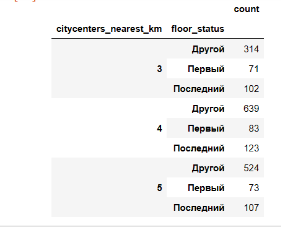

**Ниже постараюсь выполнить задание из комментария сверху:**

In [ ]:
quantity_by_categories = spb_df.groupby(['city_centers_nearest_km','floor_type']).agg({'floor_type': ['count']})

In [ ]:
display(quantity_by_categories.head(15));

**По получившейся табличке видно, что в трёх километрах от центра города больше недвижимости продавалось на первых и последних этажах, а недвижимость на этих этажах как правило, дешевле, чем на других. Начиная с четвёртого километра больше недвижимости относится к типу "другой", соответственно и цена на данных тип недвижимости выше. Думаю, что спад и подъём в центре связаны с этим.**

### Общий вывод

**Мы выполнили предобработку данных и изучили их, нашли некоторые особенности и зависимости, которые существуют на рынке недвижимости:**

    * На этапе предобработки данных мы устранили в них пропуски и аномалии. 
    * Изменили типы данных на такие, с которыми возможно производить арифметические операции. 
    * Устранили дубликаты.
    * Визуализировали данные до и после обработки для того чтобы увидеть закономерности.

**В ходе исследовательского анализа были сделаны следующие выводы:**

    * Площадь большинства объектов недвижимости колеблется в пределах 20 - 260 квадратных метров. Чем больше площадь квартиры, тем она уникальнее.
    * Чаще жилая площадь колеблется в пределах от 15 до 55 квадратных метров.
    * Чаще всего встречаются кухни с площадью от 5 до 15 квадратных метров.
    * Чем дешевле квартиры, тем чаще они встречаются.
    * Больше всего однокомнатных и двухкомнатных квартир. Квартиры с числом комнат больше 6 встречаются крайне редко.
    * Чаще всего встречаются квартиры с высотой потолков 2,7 метра. Высота потолков варьируется от 2,4 до 4-х метров. Есть редкие исключения.
    * Больше всего квартир располагаются на этажах от 1-го до 5-го. Квартиры на верхних этажах встречаются реже, чем на нижних.
    * Больше всего квартир располагается не на первом и не на последнем этажах. На последнем этаже квартир всё же немного больше, чем на первом.
    * Чаще всего встречаются пяти и девятиэтажные дома.
    * Больше всего квартир находятся на расстоянии от 9 до 17-ти километров от центра города. Так же виден пик в 5-ти километрах от центра. С удалением от центра количество недвижимости падает.
    * Ближе 5-ти километров от аэропорта жилья не найти, зато от 5-ти до 50 километров от него жилья довольно много.
    * Парки в основном располагаются в 500 метрах от жилья.
    * Чаще объявлениия о продаже недвижимости размещают по будням, чем по выходным. Примерно в 2 раза чаще.
    * Меньше всего недвижимости продаётся в декабре, январе и мае. Больше продают в феврале и ноябре.
    
**В процессе анализа столбца (days_exposition) были выявлены следующие закономерности:**
 
    * Чаще квартиры продаются в первые 3-4 месяца после публикации объявления. 
    * Быстрее всего продаются двушки с площадью 50-60 кв. метров, с высотой потолков 2,7 м и стоимостью 5-6 млн, неходящиеся не на первых и не на последних этажах.
    * Дольше продаются многокомнатные пентхаусы на 27 этаже за 30 млн и с высотой потолков 4 метра.
    * В условиях размещения объявлений на Яндекс Недвижимости срок бесплатного размещения, для СПБ равен 120 дням. Этот срок совпадает со средним сроком продажи недвижимости за 2017 и 2018 годы. Возможно при окончании срока бесплатного размещения люди просто удаляют объявления или объявления удаляются по техническим причинам. А те объявления, что задерживаются в базе больше 4-х месяцев - платные. Выделяются моды на 45 и 60 дней, а значения на 44 и 45 дней, явно имеет техническую причину снятия, из-за формата числа - они могут искажать реальный расчет скорости продажи квартиры, поэтому при анализе их можно временно исключать из датафрейма.
    * В период с 2014 по 2019 годы в исследуемых населённых пунктах значительно выросло количество объявлений о продаже недвижимости, но при этом площадь этой недвижимости снизилась, в среднем, примерно на 20 квадратных метров, что способствовало снижению цен.
    
**На общую (полную) стоимость объекта больше всего влияют следующие факторы:**

    * С увеличением прощади помещения растет его цена.
    * Чем больше жилая площадь, чем выше стоимость помещения. 
    * С увеличением площади кухни, растёт стоимость недвижимости.
    * От типа этажа стоимость помещения зависит минимально. Но недвижимость не на первом и не на последнем этажах немного дороже.
    * Зависимости стоимости жилья от дня недели размещения объявления почти нет.
    * Зависимость стоимости недвижимости от месяца размещения объявления о её продаже очень низкая, но видно, что со временем недвижимость дешевеет по причинам описанным выше.
    * Чем ближе к центру, тем выше стоимость недвижимости. Можно проследить как снижается цена на недвижимость в Санкт-Петербурге при удалении от центра. Так же видны пик и провал в центре. В трёх километрах от центра города больше недвижимости продавалось на первых и последних этажах, а недвижимость на этих этажах как правило, дешевле, чем на других. Начиная с четвёртого километра больше недвижимости относится к типу "другой", соответственно и цена на данных тип недвижимости выше. Думаю, что спад и подъём в центре связаны с этим.